# Análise Exploratória dos Dados

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Breve apresentação dos dados](#breve-apresentacao-dos-dados)
- [MeanShift](#meanshift)
- [KMeans](#kmeans)
- [Fuzzy C-Means](#fuzzy-c-means)
- [DBSCAN](#dbscan)

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [1]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from fcmeans import FCM
import seaborn as sns
import pandas as pd
import numpy as np

## Importando datasets

In [2]:
df_ureia = pd.read_csv("../databases/processed/ureia_valores_mann_kendall.csv", sep = ",", index_col = "subject_id")
df_creatinina = pd.read_csv("../databases/processed/cretinina_valores_mann_kendall.csv", sep = ",", index_col = "subject_id")

## Breve apresentacao dos dados

### DATASET ureia

In [3]:
df_ureia.head(10)

,Unnamed: 0,tendencia,p,z,Tau,inclinacao,intercepto,gender,dias_ureia_alta
subject_id,,,,,,,,,
10001884,0,0,0.094718,-1.671020,-0.571429,-3.20,39.60,1,0
10004422,1,0,0.171563,1.367198,0.476190,1.75,14.75,1,0
10004733,2,2,0.009809,-2.582485,-0.857143,-2.75,45.25,0,0
10005606,3,1,0.026224,2.222876,0.714286,1.25,6.25,1,0
10010867,4,0,0.272341,1.097688,0.380952,0.50,4.50,0,0
10019777,5,0,0.356441,-0.922168,-0.333333,-1.00,20.00,0,0
10020944,6,2,0.002667,-3.003757,-1.000000,-2.00,28.00,0,0
10023486,7,1,0.002667,3.003757,1.000000,5.25,47.25,1,7
10032381,8,1,0.007680,2.665813,0.857143,3.00,5.00,0,0


In [ ]:
df_ureia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3259 entries, 10001884 to 19999442
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3259 non-null   int64  
 1   tendencia        3259 non-null   int64  
 2   p                3259 non-null   float64
 3   z                3259 non-null   float64
 4   Tau              3259 non-null   float64
 5   inclinacao       3259 non-null   float64
 6   intercepto       3259 non-null   float64
 7   gender           3259 non-null   int64  
 8   dias_ureia_alta  3259 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 254.6 KB


In [5]:
df_ureia = df_ureia.drop(columns = ["Unnamed: 0"])

### DATASET creatinina

In [ ]:
df_creatinina.head(10)

,Unnamed: 0,tendencia,p,z,Tau,inclinacao,intercepto,gender,dias_creatinina_alta
subject_id,,,,,,,,,
10001884,0,2,0.022687,-2.278664,-0.761905,-0.100000,1.200,1,1
10004422,1,0,0.846451,-0.193649,-0.095238,0.000000,0.700,1,0
10004733,2,0,0.124306,-1.536947,-0.523810,-0.200000,4.000,0,7
10005606,3,0,0.180392,-1.339549,-0.428571,-0.025000,0.575,1,0
10010867,4,0,0.340762,-0.952661,-0.333333,-0.040000,0.620,0,0
10019777,5,2,0.031419,-2.151725,-0.714286,-0.100000,1.000,0,0
10020944,6,0,0.525358,0.635107,0.238095,0.025000,1.525,0,7
10023486,7,0,0.094718,-1.671020,-0.571429,-0.200000,3.700,1,7
10032381,8,0,0.211300,-1.250000,-0.285714,0.000000,1.200,0,0


In [ ]:
df_creatinina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3262 entries, 10001884 to 19999442
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3262 non-null   int64  
 1   tendencia             3262 non-null   int64  
 2   p                     3262 non-null   float64
 3   z                     3262 non-null   float64
 4   Tau                   3262 non-null   float64
 5   inclinacao            3262 non-null   float64
 6   intercepto            3262 non-null   float64
 7   gender                3262 non-null   int64  
 8   dias_creatinina_alta  3262 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 254.8 KB


In [8]:
df_creatinina = df_creatinina.drop(columns = ["Unnamed: 0"])

## Teste com os dataset

### Aqui será testada a correlação entre as variáveis

Em caso de correlação muito alta (90% ou mais), uma das variáveis será mantida e a(s) outra(s) removida(s) do dataset

#### DATASET ureia

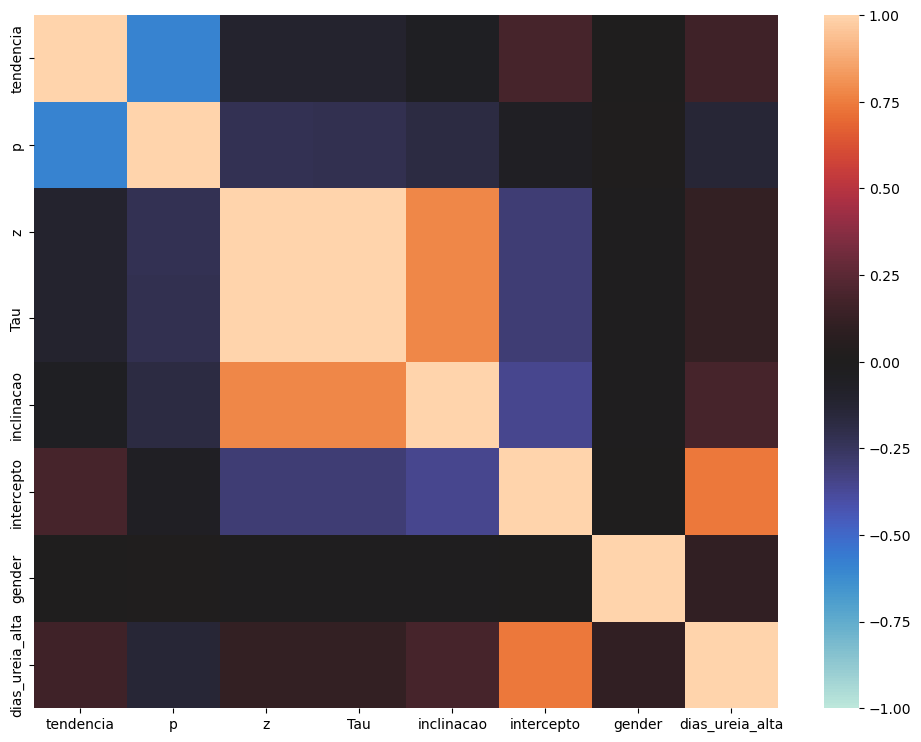

In [9]:
plt.figure(figsize = (12 ,9))

sns.heatmap(df_ureia.corr(), vmin = -1, vmax = 1, center = 0)

plt.show()

Como podemos ver no mapa de calor acima:
- As variáveis `z` e `Tau` possuem alto nível de correlação;
- Correlação essa de 100%.

Portanto será escolhido a coluna *z* para deixar o dataset.

##### Excluindo a coluna *z*

In [10]:
df_ureia = df_ureia.drop(columns = ["z"])
df_ureia.head(5)

,tendencia,p,Tau,inclinacao,intercepto,gender,dias_ureia_alta
subject_id,,,,,,,
10001884,0,0.094718,-0.571429,-3.20,39.60,1,0
10004422,0,0.171563,0.476190,1.75,14.75,1,0
10004733,2,0.009809,-0.857143,-2.75,45.25,0,0
10005606,1,0.026224,0.714286,1.25,6.25,1,0
10010867,0,0.272341,0.380952,0.50,4.50,0,0


#### DATASET creatinina

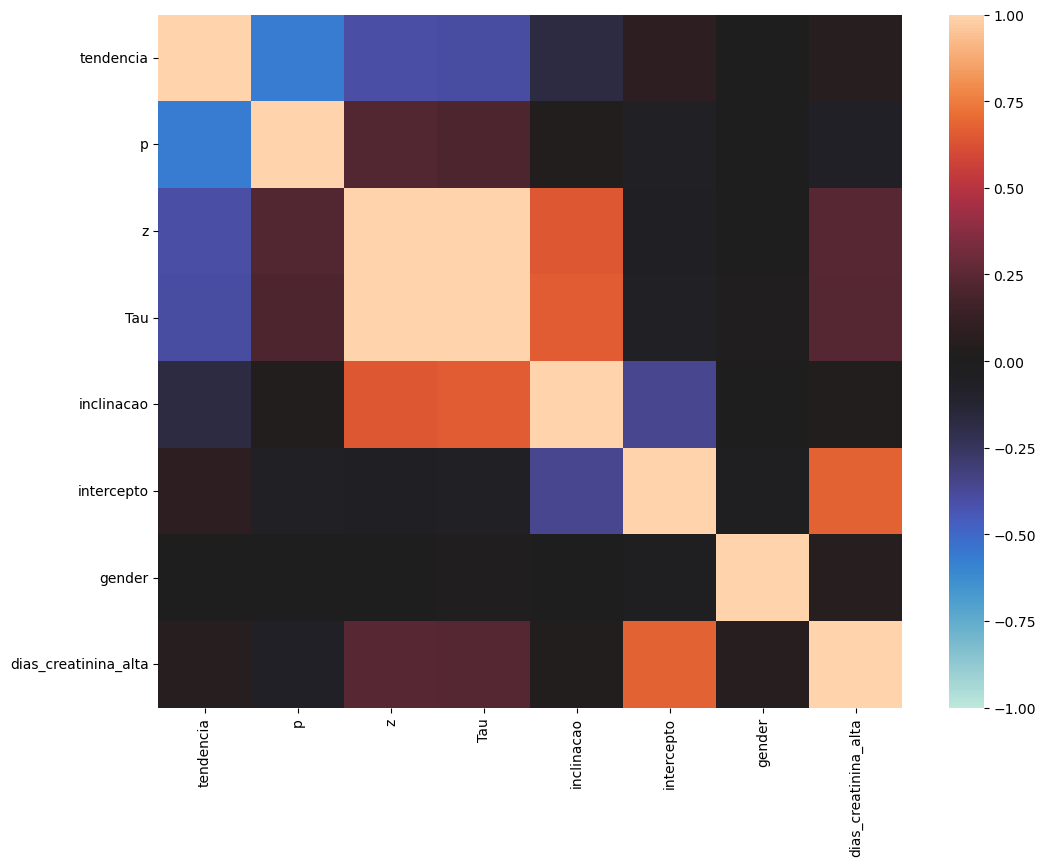

In [11]:
plt.figure(figsize = (12 ,9))

sns.heatmap(df_creatinina.corr(), vmin = -1, vmax = 1, center = 0)

plt.show()

Como podemos ver no mapa de calor acima:
- As variáveis `z` e `Tau` possuem alto nível de correlação;
- Correlação essa de 100%.

Portanto será escolhido a coluna *z* para deixar o dataset.

##### Excluindo a coluna *z*

In [12]:
df_creatinina = df_creatinina.drop(columns = ["z"])
df_creatinina.head(5)

,tendencia,p,Tau,inclinacao,intercepto,gender,dias_creatinina_alta
subject_id,,,,,,,
10001884,2,0.022687,-0.761905,-0.100,1.200,1,1
10004422,0,0.846451,-0.095238,0.000,0.700,1,0
10004733,0,0.124306,-0.523810,-0.200,4.000,0,7
10005606,0,0.180392,-0.428571,-0.025,0.575,1,0
10010867,0,0.340762,-0.333333,-0.040,0.620,0,0


## Aplicação dos Algoritmos de Agrupamento

### Criando hiper-parâmetros que serão utilizados pela maioria dos algoritmos

In [13]:
lista_metricas_silhueta:list[str] = ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]

### MeanShift

#### Criando variáveis que serão usadas durante todo o algoritmo MeanShift

In [14]:
lista_quantis_escolhidos:list[float] = [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

#### DATASET ureia

In [15]:
for quantil in lista_quantis_escolhidos:
    bandwidth:float = estimate_bandwidth(X = df_ureia,
                                         quantile = quantil,
                                         random_state = 42,
                                         n_jobs = -1)
    meanshift_ureia = MeanShift(bandwidth = bandwidth,
                                max_iter = 500,
                                n_jobs = -1)
    meanshift_ureia.fit(df_ureia)
    y_ureia:list[float] = meanshift_ureia.fit_predict(df_ureia)
    
    silhouette:list[float] = []
    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20, end = "\n")

    if len(np.unique(meanshift_ureia.labels_)) > 1:
        for metrica in lista_metricas_silhueta:
            silhouette.append(silhouette_score(df_ureia, y_ureia, metric = metrica))

        davies_bouldin:float = davies_bouldin_score(df_ureia, y_ureia)
        calinski:float = calinski_harabasz_score(df_ureia, y_ureia)

        print("SILHOUETTE SCORE: ", silhouette, end = "\n")
        print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
        print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    else:
        print("Não foi possível testar os métodos de:", end = "\n")
        print("- SILHOUETTE;", end = "\n")
        print("- DAVIS-BOULDIN;", end = "\n")
        print("- CALINSKI-HARABASZ.", end = "\n")
        print("Pois a quantidade de grupos foi menor que 2.", end = "\n")

    print(f"QUANTIDADE DE GRUPOS: {len(np.unique(meanshift_ureia.labels_))}", end = "\n")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.6113437647141121, -0.740047055966548, 0.6389183169571465, 0.6113437647141121, 0.6389183169571465, 0.6113437647141121]
DAVIS-BOULDIN SCORE:  0.7709580807330966
CALINSKI-HARABASZ SCORE:  1053.2175539145396
QUANTIDADE DE GRUPOS: 6


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.6173511283433807, -0.7452287823955797, 0.6454468422691914, 0.6173511283433807, 0.6454468422691914, 0.6173511283433807]
DAVIS-BOULDIN SCORE:  0.657361016122098
CALINSKI-HARABASZ SCORE:  1466.909817122497
QUANTIDADE DE GRUPOS: 5


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.6196668836710946, -0.5168956612047805, 0.6470716687868078, 0.6196668836710946, 0.6470716687868078, 0.6196668836710946]
DAVIS-BOULDIN SCORE:  0.5908746713234466
CALINSKI-HARABASZ SCORE:  1903.3731141775247
QUANTIDADE DE GRUPOS: 4


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
Não foi possível testar os métodos de:
- SILHOUETTE;
- DAVIS-BOULDIN;
- CAL

Como podemos ver acima, o melhor resultado aparece com o quartil = 0.3, ou seja, 30%.

O resultado é:
```txt
4 grupos são formados.

As acurácias são:
- Silhueta          :   0.64707 (Usando a distância euclidiana);
- Davis-Bouldin     :   0.59087;
- Calinski-Harabasz :   1903.37.

Lembrando que:
- Silhueta          -> maior melhor (varia entre 0.0 e 1.0);
- Davis-Bouldin     -> quanto menor melhor (varia entre 0.0 e infinito);
- Calinski-Harabasz -> quanto maior melhor (varia entre 0.0 e infinito).
```

##### Construindo a versão otimizada do modelo

In [16]:
bandwidth:float = estimate_bandwidth(X = df_ureia,
                                     quantile = 0.3,
                                     random_state = 42,
                                     n_jobs = -1)
meanshift_ureia = MeanShift(bandwidth = bandwidth,
                            max_iter = 1200,
                            n_jobs = -1)
meanshift_ureia.fit(df_ureia)
y_ureia:list[float] = meanshift_ureia.fit_predict(df_ureia)

##### Versão gráfica

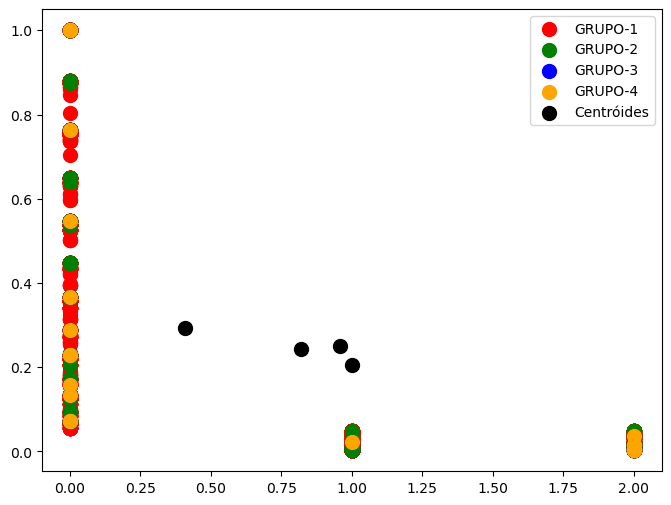

In [17]:
plt.figure(figsize = (8, 6))

### OS PONTOS GERAIS
plt.scatter(df_ureia.values[y_ureia == 0, 0], df_ureia.values[y_ureia == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(df_ureia.values[y_ureia == 1, 0], df_ureia.values[y_ureia == 1, 1], s = 100, c = "green", label = "GRUPO-2")
plt.scatter(df_ureia.values[y_ureia == 2, 0], df_ureia.values[y_ureia == 2, 1], s = 100, c = "blue", label = "GRUPO-3")
plt.scatter(df_ureia.values[y_ureia == 2, 0], df_ureia.values[y_ureia == 2, 1], s = 100, c = "orange", label = "GRUPO-4")

### OS CENTROIDES
plt.scatter(meanshift_ureia.cluster_centers_[:, 0], meanshift_ureia.cluster_centers_[:, 1], s = 100, c = "black", label = "Centróides")

plt.legend()
plt.show()

Na figura acima, por conta da forma como os dados estão agrupados não conseguimos retirar nenhum informação útil. Então, abaixo, vamos testar com o gráfico *PairPLot* do pacote seaborn.

##### Gráfico PairPlot

<Figure size 1200x900 with 0 Axes>

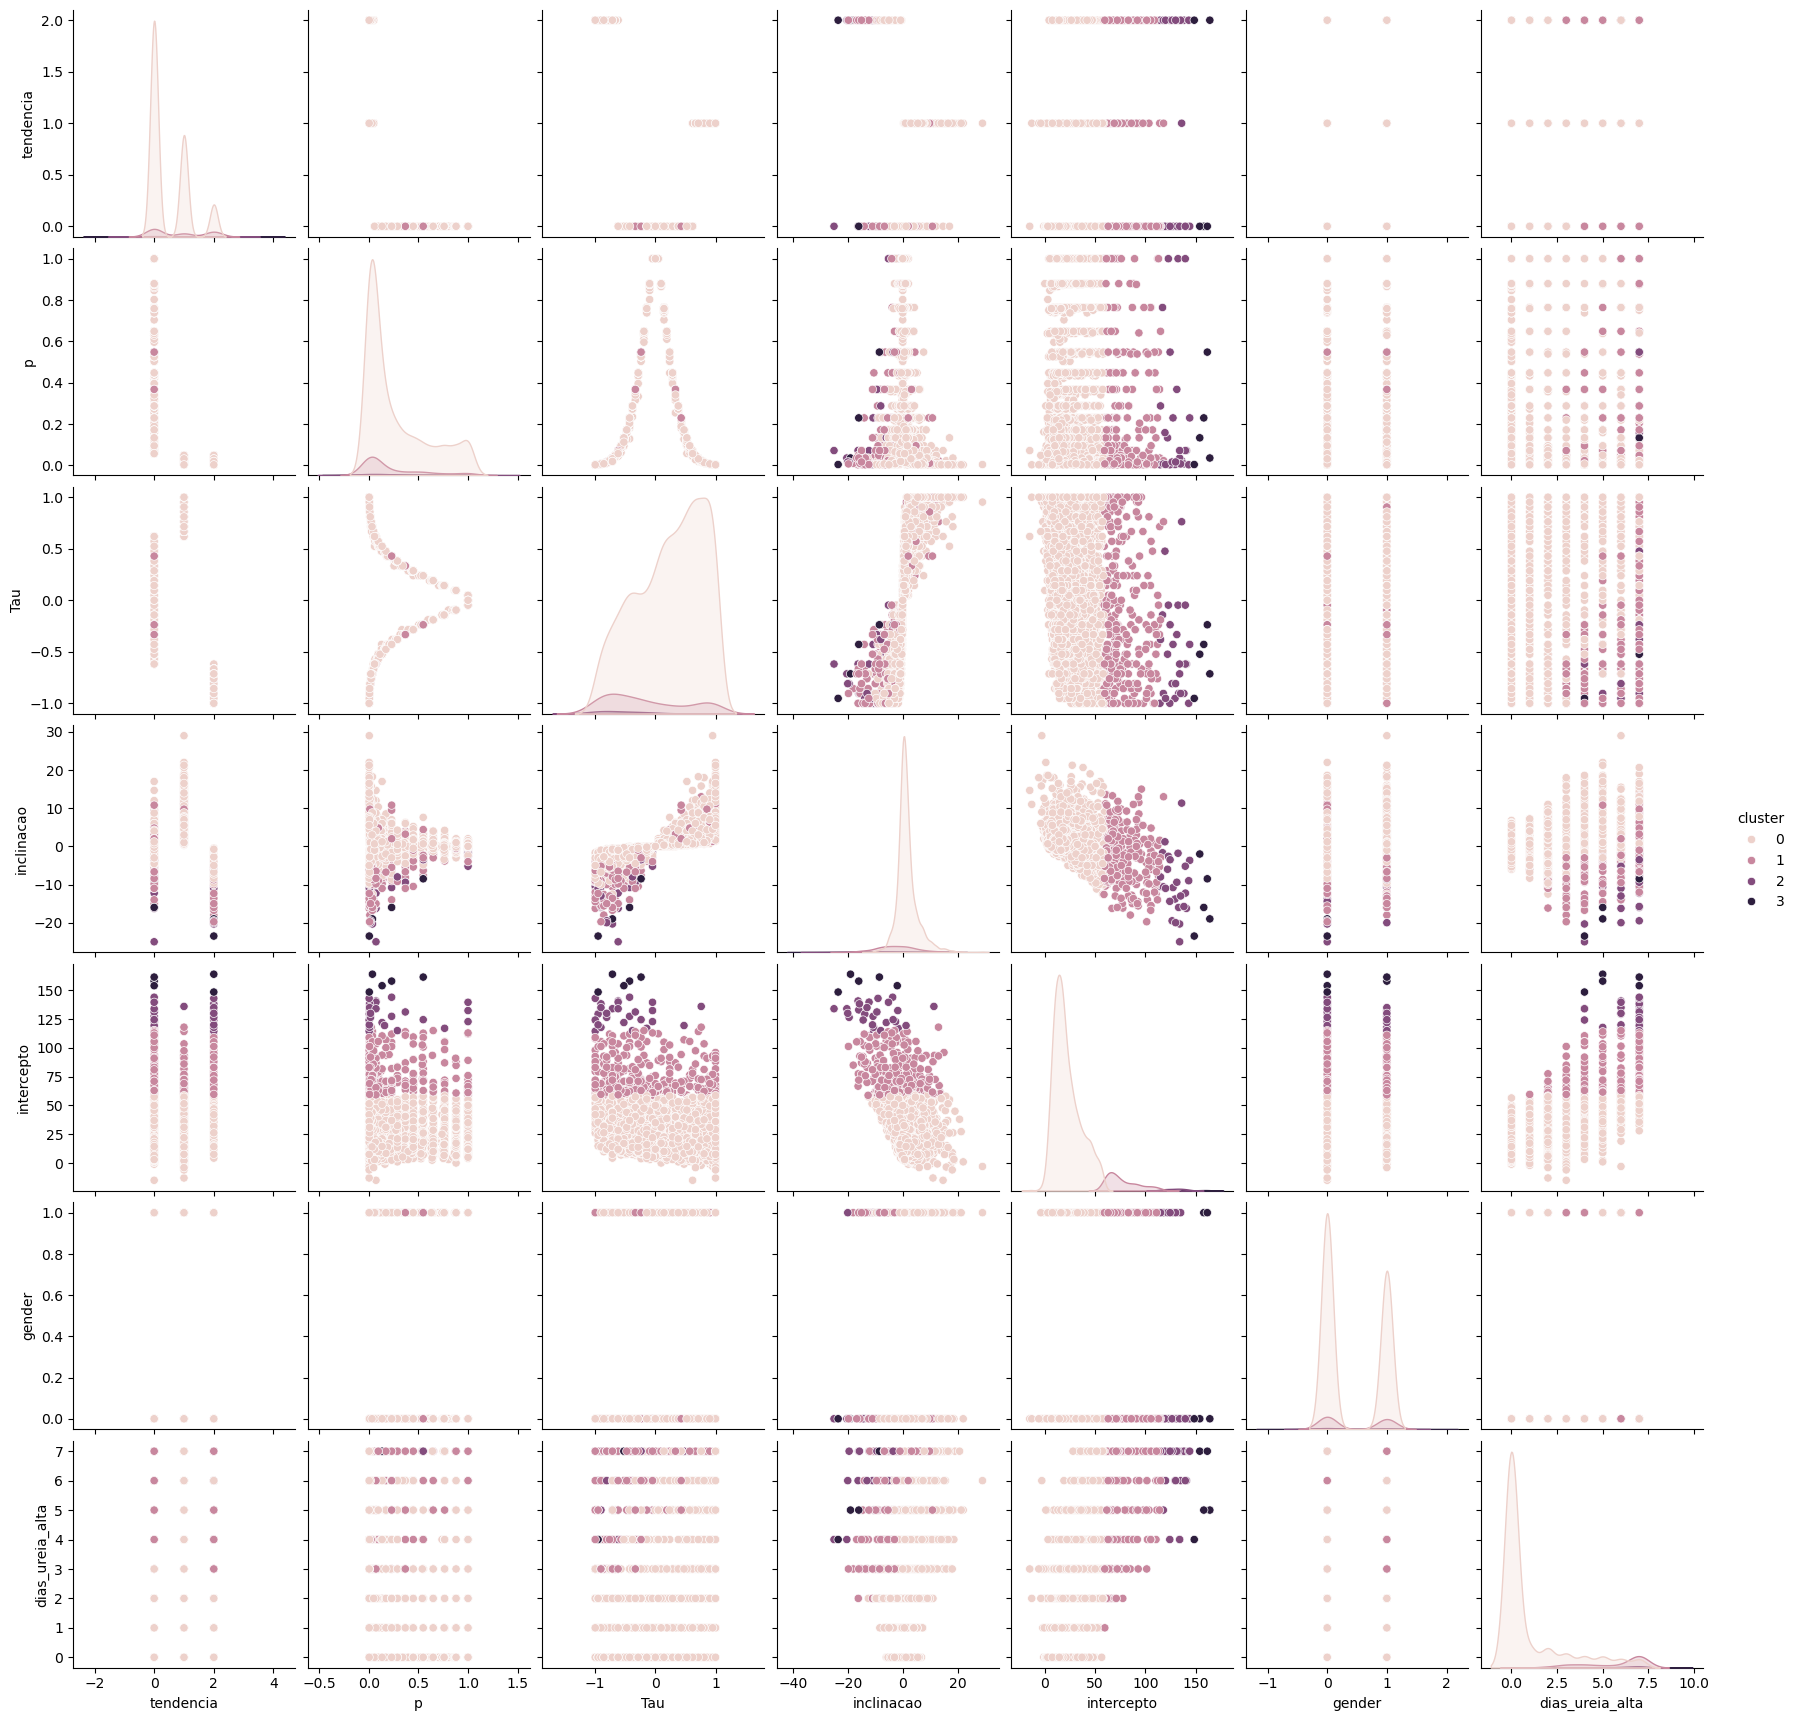

In [18]:
df_temp = df_ureia.copy()
df_temp["cluster"] = y_ureia

plt.figure(figsize = (12, 9))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

#### DATASET creatinina

In [19]:
for quantil in lista_quantis_escolhidos:
    bandwidth:float = estimate_bandwidth(X = df_creatinina,
                                         quantile = quantil,
                                         random_state = 42,
                                         n_jobs = -1)
    meanshift_creatinina = MeanShift(bandwidth = bandwidth,
                                     max_iter = 500,
                                     n_jobs = -1)
    meanshift_creatinina.fit(df_creatinina)
    y_creatinina:list[float] = meanshift_creatinina.fit_predict(df_creatinina)
    
    silhouette:list[float] = []
    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20, end = "\n")

    if len(np.unique(meanshift_creatinina.labels_)) > 1:
        for metrica in lista_metricas_silhueta:
            silhouette.append(silhouette_score(df_creatinina, y_creatinina, metric = metrica))

        davies_bouldin:float = davies_bouldin_score(df_creatinina, y_creatinina)
        calinski:float = calinski_harabasz_score(df_creatinina, y_creatinina)

        print("SILHOUETTE SCORE: ", silhouette, end = "\n")
        print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
        print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    else:
        print("Não foi possível testar os métodos de:", end = "\n")
        print("- SILHOUETTE;", end = "\n")
        print("- DAVIS-BOULDIN;", end = "\n")
        print("- CALINSKI-HARABASZ.", end = "\n")
        print("Pois a quantidade de grupos foi menor que 2.", end = "\n")

    print(f"QUANTIDADE DE GRUPOS: {len(np.unique(meanshift_creatinina.labels_))}", end = "\n")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.42553809982860574, -0.07261559725711453, 0.446173953163252, 0.42553809982860574, 0.446173953163252, 0.42553809982860574]
DAVIS-BOULDIN SCORE:  0.8988269991827269
CALINSKI-HARABASZ SCORE:  2204.0361193456115
QUANTIDADE DE GRUPOS: 9


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.4689252001376396, -0.04940702320633797, 0.48999476378527285, 0.4689252001376396, 0.48999476378527285, 0.4689252001376396]
DAVIS-BOULDIN SCORE:  0.6297548333230557
CALINSKI-HARABASZ SCORE:  2479.919410038587
QUANTIDADE DE GRUPOS: 7


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.47079972670429737, 0.08930454264420332, 0.4893708453850193, 0.47079972670429737, 0.4893708453850193, 0.47079972670429737]
DAVIS-BOULDIN SCORE:  0.8149136653730147
CALINSKI-HARABASZ SCORE:  4700.374416432876
QUANTIDADE DE GRUPOS: 4


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.5812724578255228, 0.14721877559977045, 0.637

Como podemos ver acima, o melhor resultado aparece com o quartil = 0.5, ou seja, 50%.

O resultado é:
```txt
2 grupos são formados.

As acurácias são:
- Silhueta          :   0.65118 (Usando a distância euclidiana);
- Davis-Bouldin     :   0.53924;
- Calinski-Harabasz :   8939.69.

Lembrando que:
- Silhueta          -> maior melhor (varia entre 0.0 e 1.0);
- Davis-Bouldin     -> quanto menor melhor (varia entre 0.0 e infinito);
- Calinski-Harabasz -> quanto maior melhor (varia entre 0.0 e infinito).
```

##### Construindo a versão otimizada do modelo

In [20]:
bandwidth:float = estimate_bandwidth(X = df_creatinina,
                                     quantile = 0.5,
                                     random_state = 42,
                                     n_jobs = -1)
meanshift_creatinina = MeanShift(bandwidth = bandwidth,
                                 max_iter = 1200,
                                 n_jobs = -1)
meanshift_creatinina.fit(df_creatinina)
y_creatinina:list[float] = meanshift_creatinina.fit_predict(df_creatinina)

##### Versão gráfica

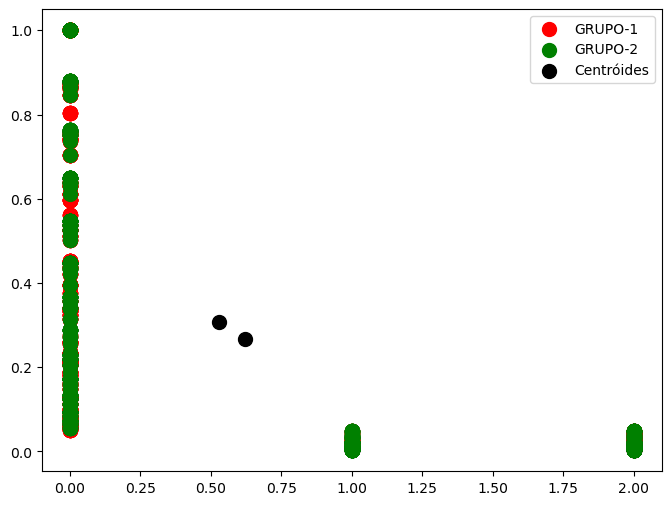

In [21]:
plt.figure(figsize = (8, 6))

### OS PONTOS GERAIS
plt.scatter(df_creatinina.values[y_creatinina == 0, 0], df_creatinina.values[y_creatinina == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(df_creatinina.values[y_creatinina == 1, 0], df_creatinina.values[y_creatinina == 1, 1], s = 100, c = "green", label = "GRUPO-2")

### OS CENTROIDES
plt.scatter(meanshift_creatinina.cluster_centers_[:, 0], meanshift_creatinina.cluster_centers_[:, 1], s = 100, c = "black", label = "Centróides")

plt.legend()
plt.show()

Na figura acima, por conta da forma como os dados estão agrupados não conseguimos retirar nenhum informação útil. Então, abaixo, vamos testar com o gráfico *PairPLot* do pacote seaborn.

##### Gráfico PairPlot

<Figure size 1200x900 with 0 Axes>

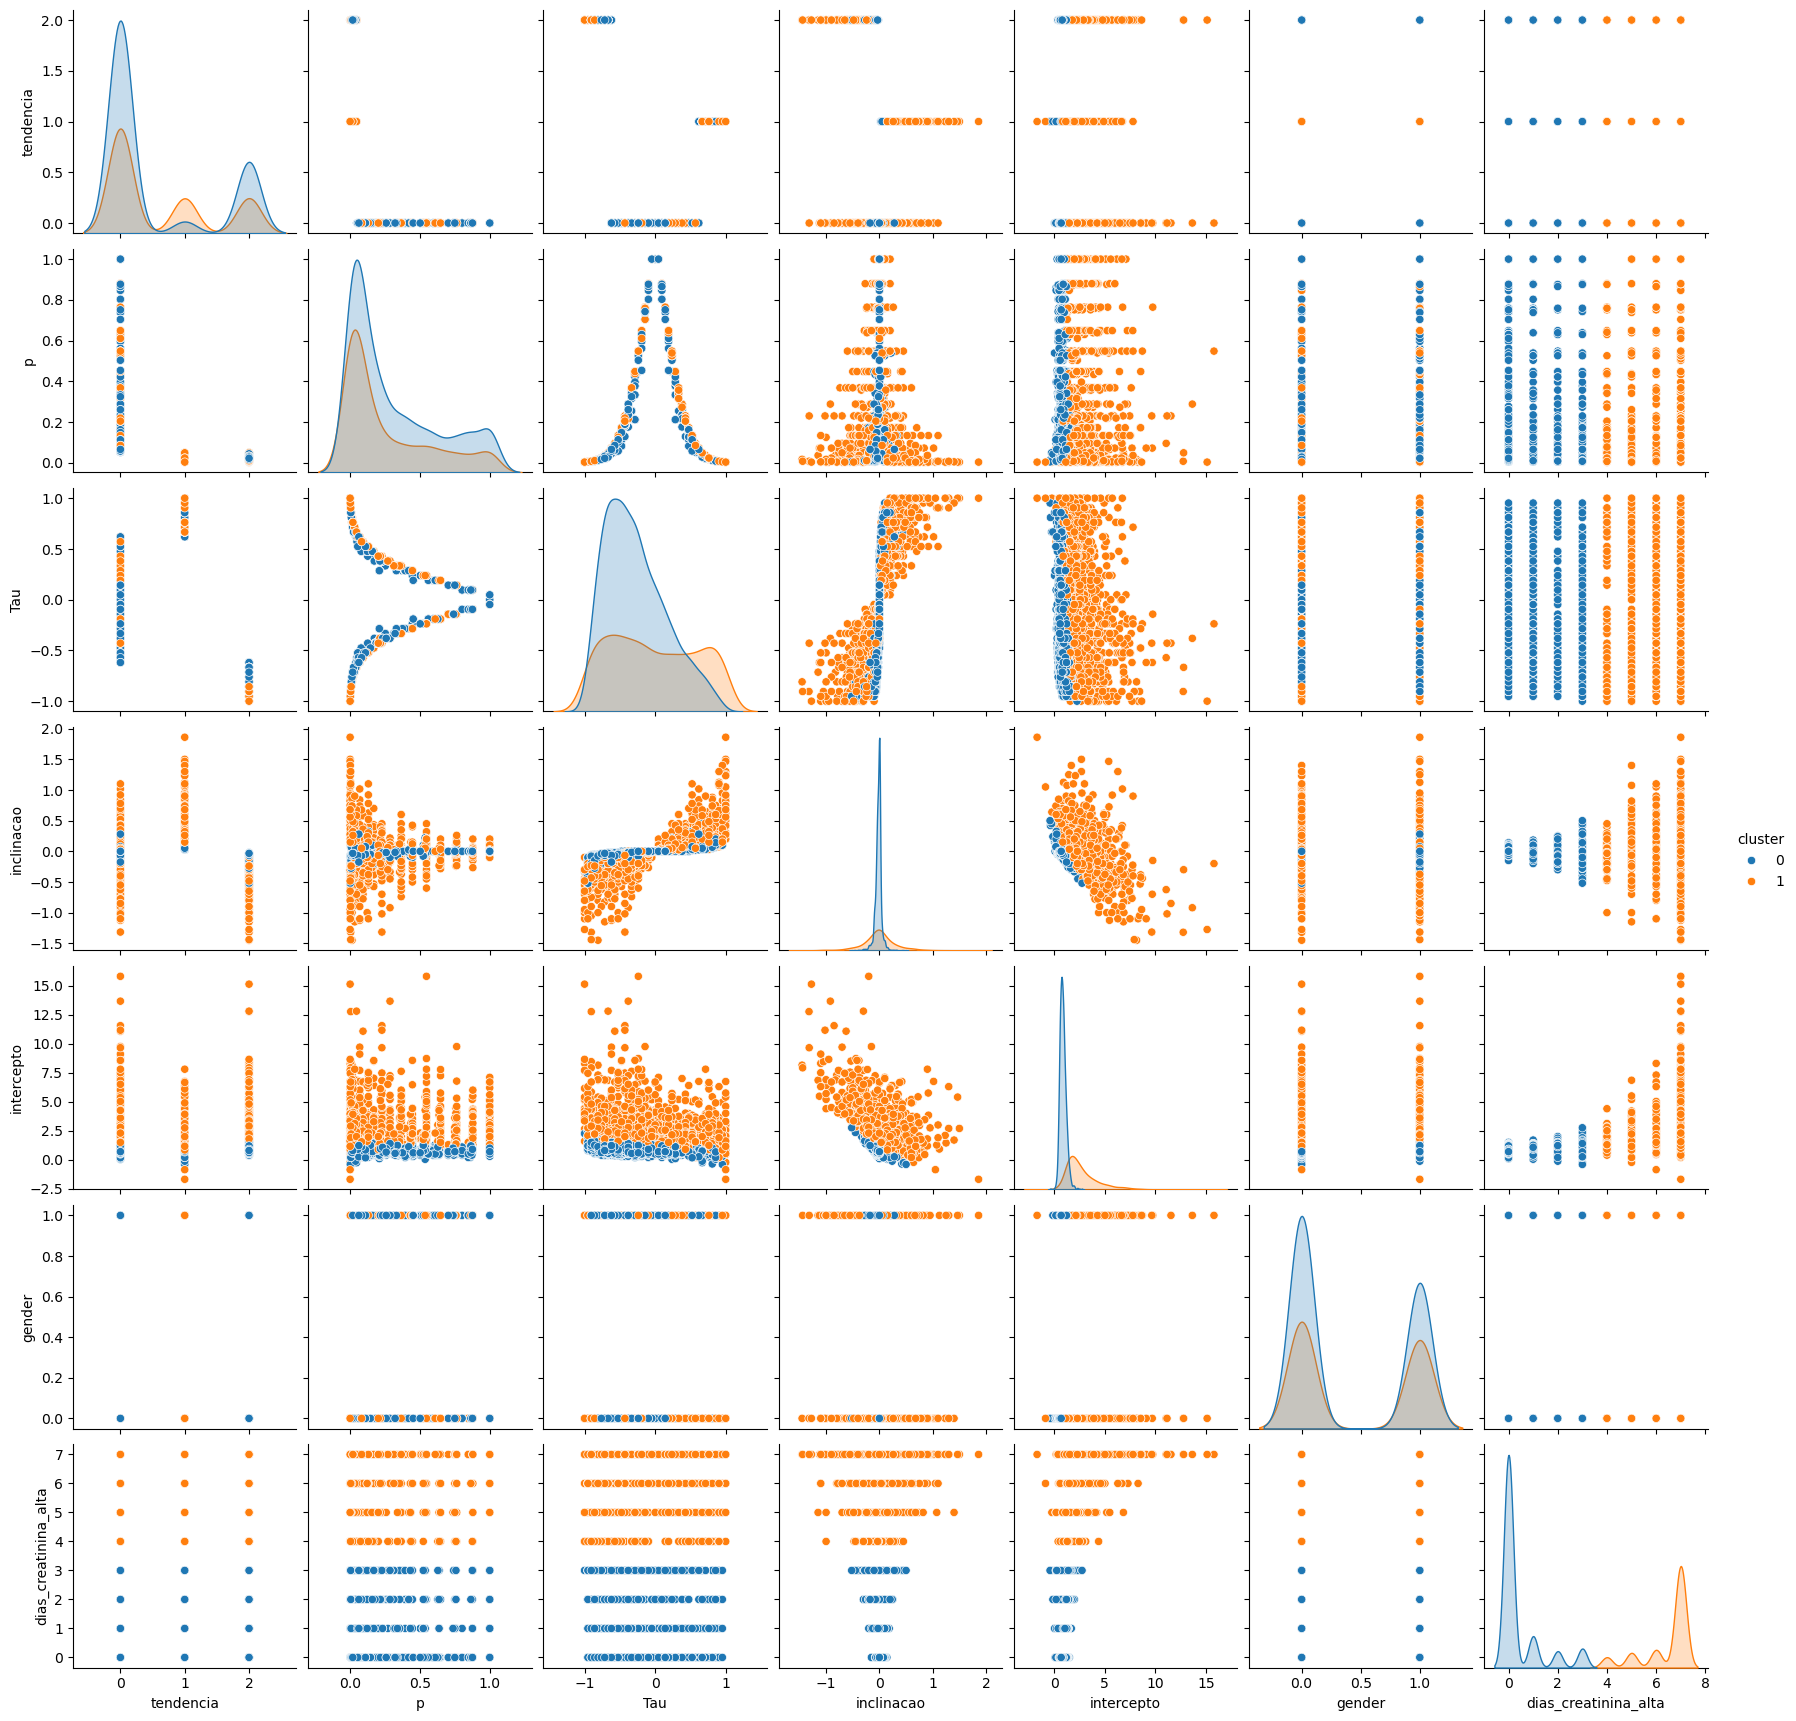

In [22]:
df_temp = df_creatinina.copy()
df_temp["cluster"] = y_creatinina

plt.figure(figsize = (12, 9))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

### KMeans

#### Hiper-parâmetros para testes com o GridSearchCV

In [23]:
parametros_grid_search = {
    "n_clusters": [i for i in range(2, 14)],
    "init": ["k-means++", "random"],
    "n_init": [1, 2, 3, 4, 5, "auto"],
    "max_iter": [j for j in range(400, 1000, 100)],
    "algorithm": ["lloyd", "elkan"],
}

#### DATASET ureia

#### Teste com o GridSearchCV

In [24]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(df_ureia)

print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)

KMeans(algorithm='elkan', max_iter=700, n_clusters=13, n_init=3)
-15351.222097039426
1148


#### Criando modelo a partir do GridSearchCV

In [25]:
kmeans_ureia = KMeans(n_clusters = 13,
                      max_iter = 500,
                      n_init = 3,
                      algorithm = "lloyd")
y_ureia = kmeans_ureia.fit_predict(df_ureia)

#### Testando modelo do GridSearchCV

In [26]:
silhouette:list[float] = []

for metrica in lista_metricas_silhueta:
    silhouette.append(silhouette_score(df_ureia, y_ureia, metric = metrica))

davies_bouldin:float = davies_bouldin_score(df_ureia, y_ureia)
calinski_harabasz:float = calinski_harabasz_score(df_ureia, y_ureia)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")

SILHOUETTE SCORE:  [0.31189975879875853, -0.28452649677569325, 0.3611623424528228, 0.31189975879875853, 0.3611623424528228, 0.31189975879875853]
DAVIS-BOULDIN SCORE:  0.8839895716413783
CALINSKI-HARABASZ SCORE:  6396.962758636228


#### Teste com Método do Joelho

Este teste irá levar em consideração alguns dos parâmetros retornados como ótimos pelo GridSearchCV

In [27]:
soma_dos_quadrados_ureia:list[float] = []

for i in range(1, 20):
    kmeans_ureia = KMeans(n_clusters = i,
                          init = "k-means++",
                          n_init = 3,
                          max_iter = 1200,
                          tol = 0.0004,
                          random_state = 42,
                          algorithm = "lloyd")
    kmeans_ureia.fit(df_ureia)
    soma_dos_quadrados_ureia.append(kmeans_ureia.inertia_)

#### Imprimindo o resultado do Método do Joelho 

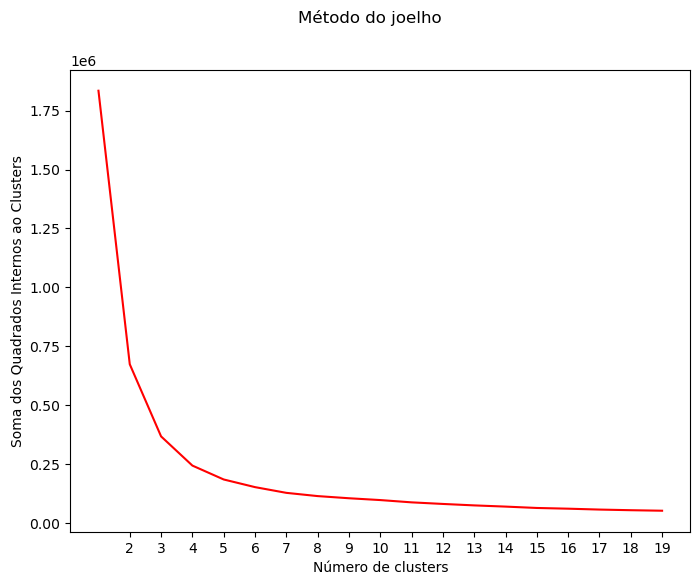

In [28]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(1, 20), soma_dos_quadrados_ureia, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No gráfico acima, é possível notar 3 joelhos:
- `X = 2`;
- `X = 3`;
- `X = 4`.

Abaixo, vamos testar a qualidade de cada um destes joelhos.

In [29]:
lista_joelhos_percebidos:list[int] = [2, 3, 4]
lista_modelos_kmeans:list[KMeans] = []

for i in lista_joelhos_percebidos:
    kmeans_ureia = KMeans(n_clusters = i,
                          init = "k-means++",
                          n_init = 3,
                          max_iter = 1200,
                          tol = 0.00001,
                          random_state = 42,
                          algorithm = "lloyd")

    lista_modelos_kmeans.append(kmeans_ureia.fit(df_ureia))

for modelo, joelho in zip(lista_modelos_kmeans, lista_joelhos_percebidos):
    silhouette:list[float] = []
    y_ureia:list[float] = modelo.predict(df_ureia)

    for metrica in lista_metricas_silhueta:
        silhouette.append(silhouette_score(df_ureia, y_ureia, metric = metrica))

    davies_bouldin:float = davies_bouldin_score(df_ureia, y_ureia)
    calinski_harabasz:float = calinski_harabasz_score(df_ureia, y_ureia)

    print(f"Para {joelho} joelhos:", end = "\n")
    print("=" * 20, end = "\n")
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")
    print("Inércia: %.3f" % modelo.inertia_, end = "\n")
    print("=" * 20, end = "\n\n\n")

Para 2 joelhos:
SILHOUETTE SCORE:  [0.6244557633003711, -0.251398699676212, 0.6560046774662056, 0.6244557633003711, 0.6560046774662056, 0.6244557633003711]
DAVIS-BOULDIN SCORE:  0.6003762153116484
CALINSKI-HARABASZ SCORE:  5606.062250997897
Inércia: 674074.457


Para 3 joelhos:
SILHOUETTE SCORE:  [0.5459962833462019, -0.4247979310453948, 0.5902046659789539, 0.5459962833462019, 0.5902046659789539, 0.5459962833462019]
DAVIS-BOULDIN SCORE:  0.6070836567121017
CALINSKI-HARABASZ SCORE:  6485.730657513332
Inércia: 368050.766


Para 4 joelhos:
SILHOUETTE SCORE:  [0.4626678976206612, -0.44161764434594863, 0.5154909691017066, 0.4626678976206612, 0.5154909691017066, 0.4626678976206612]
DAVIS-BOULDIN SCORE:  0.6515096837586591
CALINSKI-HARABASZ SCORE:  7062.47845092167
Inércia: 244275.792




Como é possível ver acima, o melhor resultado é com 2 grupos.

O resultado obtido utilizando o Método do Joelho foi melhor que o resultado obtido utilizando os parâmetros do GridSearchCV.

Além disso, o resultado do teste do joelho é diferente do resultado do algoritmo MeanShift. Enquanto o MeanShift retornou 4 grupos formados, aqui, com o Método de Joelho, temos 2 grupos formados. Temos que testar com a quantidade de clusteres do MeanShift para atestar qual é o melhor resultado.

#### Criando modelo à partir do resultado do algoritmo MeanShift

In [59]:
kmeans_ureia = KMeans(n_clusters = 4,
                      init = "k-means++",
                      n_init = 3,
                      max_iter = 1200,
                      tol = 0.00001,
                      random_state = 42,
                      algorithm = "lloyd")

y_ureia = kmeans_ureia.fit_predict(df_ureia)

#### Testando modelo baseado no MeanShift

In [60]:
silhouette:list[float] = []

for metrica in lista_metricas_silhueta:
    silhouette.append(silhouette_score(df_ureia, y_ureia, metric = metrica))

davies_bouldin:float = davies_bouldin_score(df_ureia, y_ureia)
calinski_harabasz:float = calinski_harabasz_score(df_ureia, y_ureia)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")

SILHOUETTE SCORE:  [0.4626678976206612, -0.44161764434594863, 0.5154909691017066, 0.4626678976206612, 0.5154909691017066, 0.4626678976206612]
DAVIS-BOULDIN SCORE:  0.6515096837586591
CALINSKI-HARABASZ SCORE:  7062.47845092167


Temos então que, de fato, o resultado obtido via Método do Joelho, com 2 grupos, é melhor que o resultado obtido acima, utilizando o resultado do agrupamento do algoritmo MeanShift. Será continuado o resultado do Método do Joelho.

#### Criando modelo final - seguindo o Método do Joelho 

In [61]:
kmeans_ureia = KMeans(n_clusters = 2,
                      init = "k-means++",
                      n_init = 3,
                      max_iter = 1200,
                      tol = 0.00001,
                      random_state = 42,
                      algorithm = "lloyd")

y_ureia = kmeans_ureia.fit_predict(df_ureia)

#### Imprimindo o resultado final

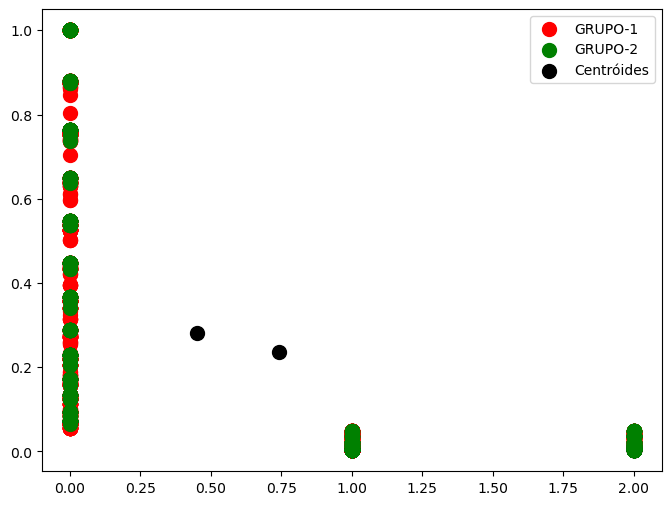

In [62]:
plt.figure(figsize = (8, 6))

### OS PONTOS GERAIS
plt.scatter(df_ureia.values[y_ureia == 0, 0], df_ureia.values[y_ureia == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(df_ureia.values[y_ureia == 1, 0], df_ureia.values[y_ureia == 1, 1], s = 100, c = "green", label = "GRUPO-2")

### OS CENTROIDES
plt.scatter(kmeans_ureia.cluster_centers_[:, 0], kmeans_ureia.cluster_centers_[:, 1], s = 100, c = "black", label = "Centróides")

plt.legend()
plt.show()

Na figura acima, por conta da forma como os dados estão agrupados não conseguimos retirar nenhum informação útil. Então, abaixo, vamos testar com o gráfico *PairPLot* do pacote seaborn.

##### Gráfico PairPlot

<Figure size 1200x900 with 0 Axes>

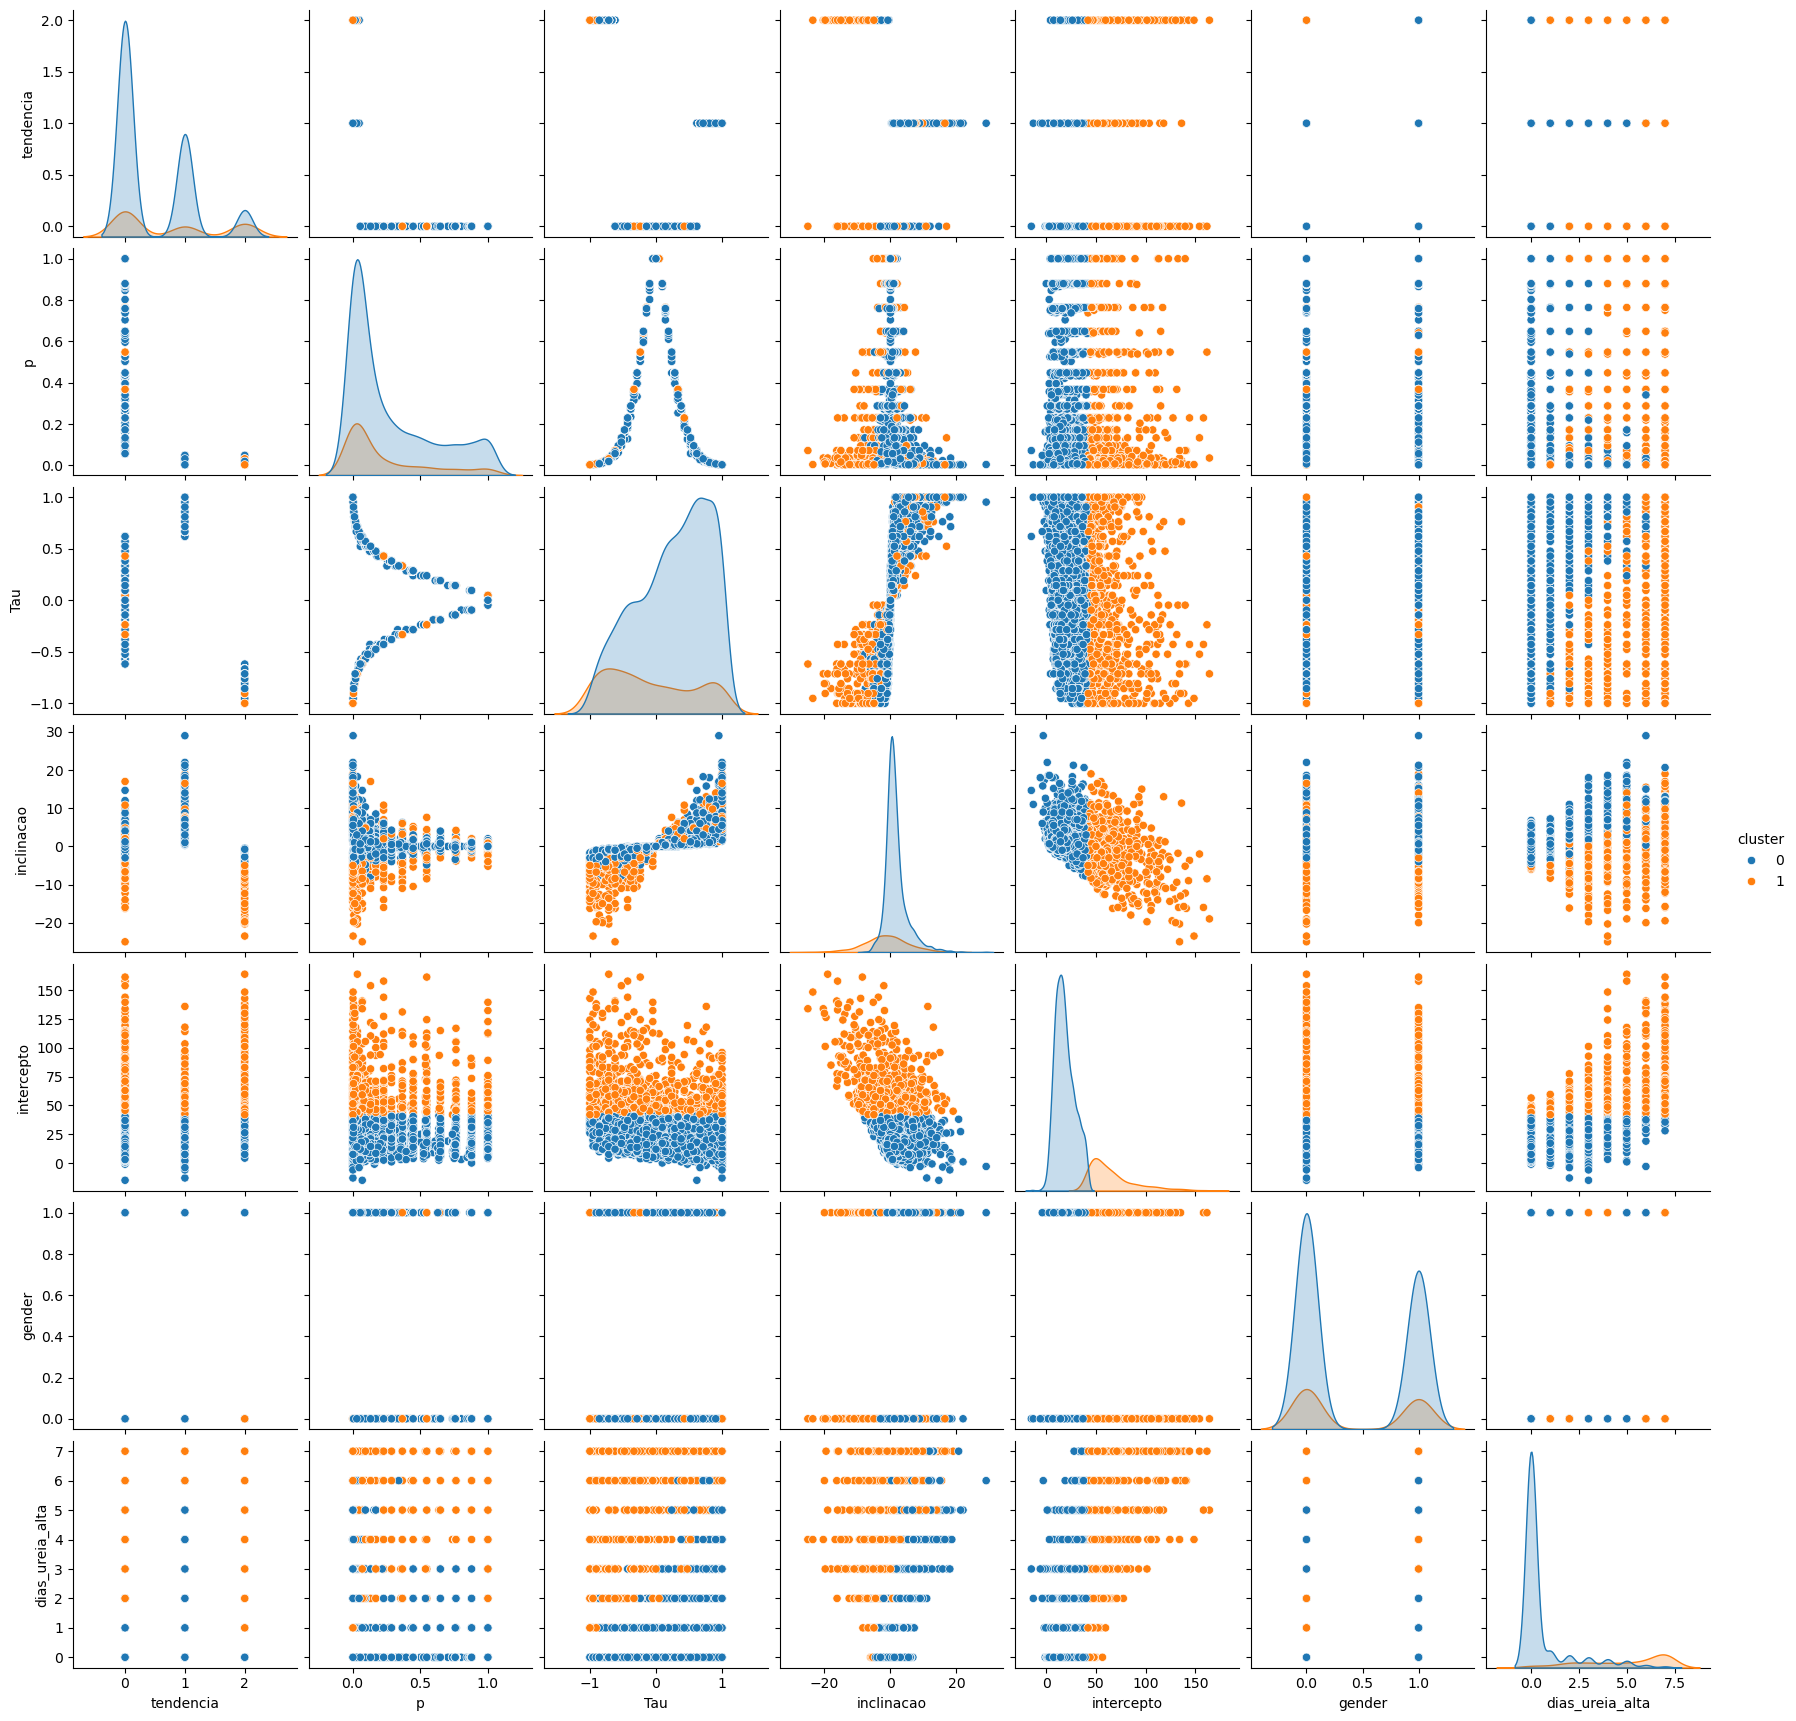

In [63]:
df_temp = df_ureia.copy()
df_temp["cluster"] = y_ureia

plt.figure(figsize = (12, 9))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

#### DATASET creatinina

#### Teste com o GridSearchCV

In [64]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(df_creatinina)

print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)

KMeans(max_iter=900, n_clusters=13, n_init=4)
-521.7191666805453
429


#### Criando modelo a partir do GridSearchCV

In [66]:
kmeans_creatinina = KMeans(n_clusters = 13,
                           max_iter = 700,
                           n_init = 4,
                           algorithm = "lloyd")
y_creatinina = kmeans_creatinina.fit_predict(df_creatinina)

#### Testando modelo do GridSearchCV

In [67]:
silhouette:list[float] = []

for metrica in lista_metricas_silhueta:
    silhouette.append(silhouette_score(df_creatinina, y_creatinina, metric = metrica))

davies_bouldin:float = davies_bouldin_score(df_creatinina, y_creatinina)
calinski_harabasz:float = calinski_harabasz_score(df_creatinina, y_creatinina)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")

SILHOUETTE SCORE:  [0.40375576911614214, 0.32234696882730285, 0.38418504647522883, 0.40375576911614214, 0.38418504647522883, 0.40375576911614214]
DAVIS-BOULDIN SCORE:  1.0393743949111636
CALINSKI-HARABASZ SCORE:  4014.9046176096444


#### Teste com Método do Joelho

Este teste irá levar em consideração alguns dos parâmetros retornados como ótimos pelo GridSearchCV

In [68]:
soma_dos_quadrados_creatinina:list[float] = []

for i in range(1, 20):
    kmeans_creatinina = KMeans(n_clusters = i,
                          init = "k-means++",
                          n_init = 4,
                          max_iter = 1200,
                          tol = 0.0004,
                          random_state = 42,
                          algorithm = "lloyd")
    kmeans_creatinina.fit(df_creatinina)
    soma_dos_quadrados_creatinina.append(kmeans_creatinina.inertia_)

#### Imprimindo o resultado do Método do Joelho 

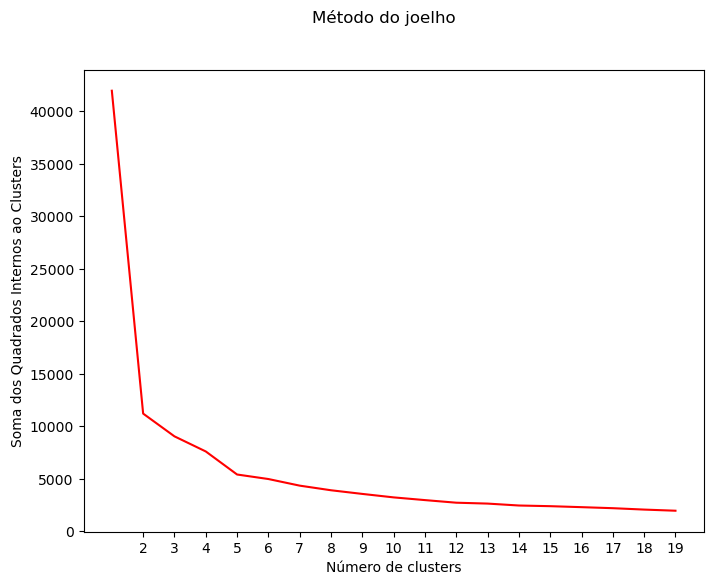

In [69]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(1, 20), soma_dos_quadrados_creatinina, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No gráfico acima, é possível notar 4 joelhos:
- `X = 2`;
- `X = 3`;
- `X = 5`;
- `X = 12`.

Abaixo, vamos testar a qualidade de cada um destes joelhos.

In [70]:
lista_joelhos_percebidos:list[int] = [2, 3, 5, 12]
lista_modelos_kmeans:list[KMeans] = []

for i in lista_joelhos_percebidos:
    kmeans_creatinina = KMeans(n_clusters = i,
                                       init = "k-means++",
                                       n_init = 4,
                                       max_iter = 1200,
                                       tol = 0.00001,
                                       random_state = 42,
                                       algorithm = "lloyd")

    lista_modelos_kmeans.append(kmeans_creatinina.fit(df_creatinina))

for modelo, joelho in zip(lista_modelos_kmeans, lista_joelhos_percebidos):
    silhouette:list[float] = []
    y_creatinina:list[float] = modelo.predict(df_creatinina)

    for metrica in lista_metricas_silhueta:
        silhouette.append(silhouette_score(df_creatinina, y_creatinina, metric = metrica))

    davies_bouldin:float = davies_bouldin_score(df_creatinina, y_creatinina)
    calinski_harabasz:float = calinski_harabasz_score(df_creatinina, y_creatinina)

    print(f"Para {joelho} joelhos:", end = "\n")
    print("=" * 20, end = "\n")
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")
    print("Inércia: %.3f" % modelo.inertia_, end = "\n")
    print("=" * 20, end = "\n\n\n")

Para 2 joelhos:
SILHOUETTE SCORE:  [0.606392861456724, 0.4286614665269984, 0.6511862271894391, 0.606392861456724, 0.6511862271894391, 0.606392861456724]
DAVIS-BOULDIN SCORE:  0.5392401557542985
CALINSKI-HARABASZ SCORE:  8939.694914864593
Inércia: 11216.445


Para 3 joelhos:
SILHOUETTE SCORE:  [0.5307273790452218, 0.20499955892244984, 0.5809139310417334, 0.5307273790452218, 0.5809139310417334, 0.5307273790452218]
DAVIS-BOULDIN SCORE:  0.8338284167704568
CALINSKI-HARABASZ SCORE:  6286.969530901581
Inércia: 8639.914


Para 5 joelhos:
SILHOUETTE SCORE:  [0.4518453171182109, 0.3208007040925435, 0.46763354583607497, 0.4518453171182109, 0.46763354583607497, 0.4518453171182109]
DAVIS-BOULDIN SCORE:  0.8494129121875901
CALINSKI-HARABASZ SCORE:  5498.700496724732
Inércia: 5413.922


Para 12 joelhos:
SILHOUETTE SCORE:  [0.40757028347824387, 0.3387702924198804, 0.3865700111034911, 0.40757028347824387, 0.3865700111034911, 0.40757028347824387]
DAVIS-BOULDIN SCORE:  1.027857492240565
CALINSKI-HARABAS

Como é possível ver acima, o melhor resultado é com 2 grupos.

O resultado obtido utilizando o Método do Joelho foi melhor que o resultado obtido utilizando os parâmetros do GridSearchCV.

Além disso, o resultado do teste do joelho é semelhante ao resultado do algoritmo MeanShift, portanto este teste não será realizado.

#### Criando modelo final - seguindo o Método do Joelho 

In [73]:
kmeans_creatinina = KMeans(n_clusters = 2,
                           init = "k-means++",
                           n_init = 4,
                           max_iter = 1200,
                           tol = 0.00001,
                           random_state = 42,
                           algorithm = "lloyd")

y_creatinina = kmeans_creatinina.fit_predict(df_creatinina)

#### Imprimindo o resultado final

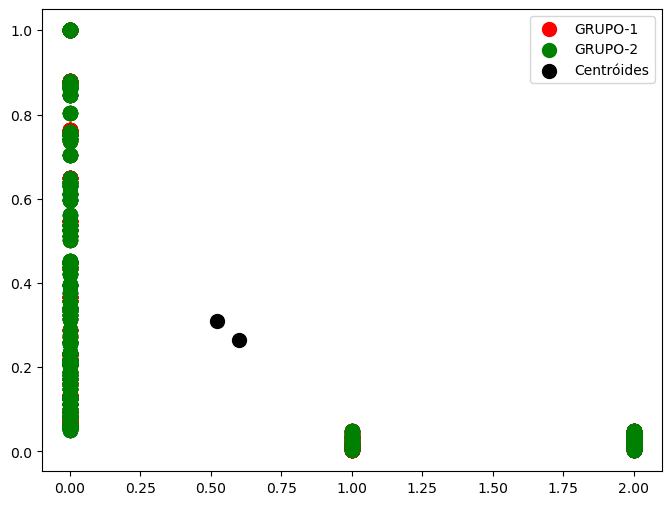

In [74]:
plt.figure(figsize = (8, 6))

### OS PONTOS GERAIS
plt.scatter(df_creatinina.values[y_creatinina == 0, 0], df_creatinina.values[y_creatinina == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(df_creatinina.values[y_creatinina == 1, 0], df_creatinina.values[y_creatinina == 1, 1], s = 100, c = "green", label = "GRUPO-2")

### OS CENTROIDES
plt.scatter(kmeans_creatinina.cluster_centers_[:, 0], kmeans_creatinina.cluster_centers_[:, 1], s = 100, c = "black", label = "Centróides")

plt.legend()
plt.show()

Na figura acima, por conta da forma como os dados estão agrupados não conseguimos retirar nenhum informação útil. Então, abaixo, vamos testar com o gráfico *PairPLot* do pacote seaborn.

##### Gráfico PairPlot

<Figure size 1200x900 with 0 Axes>

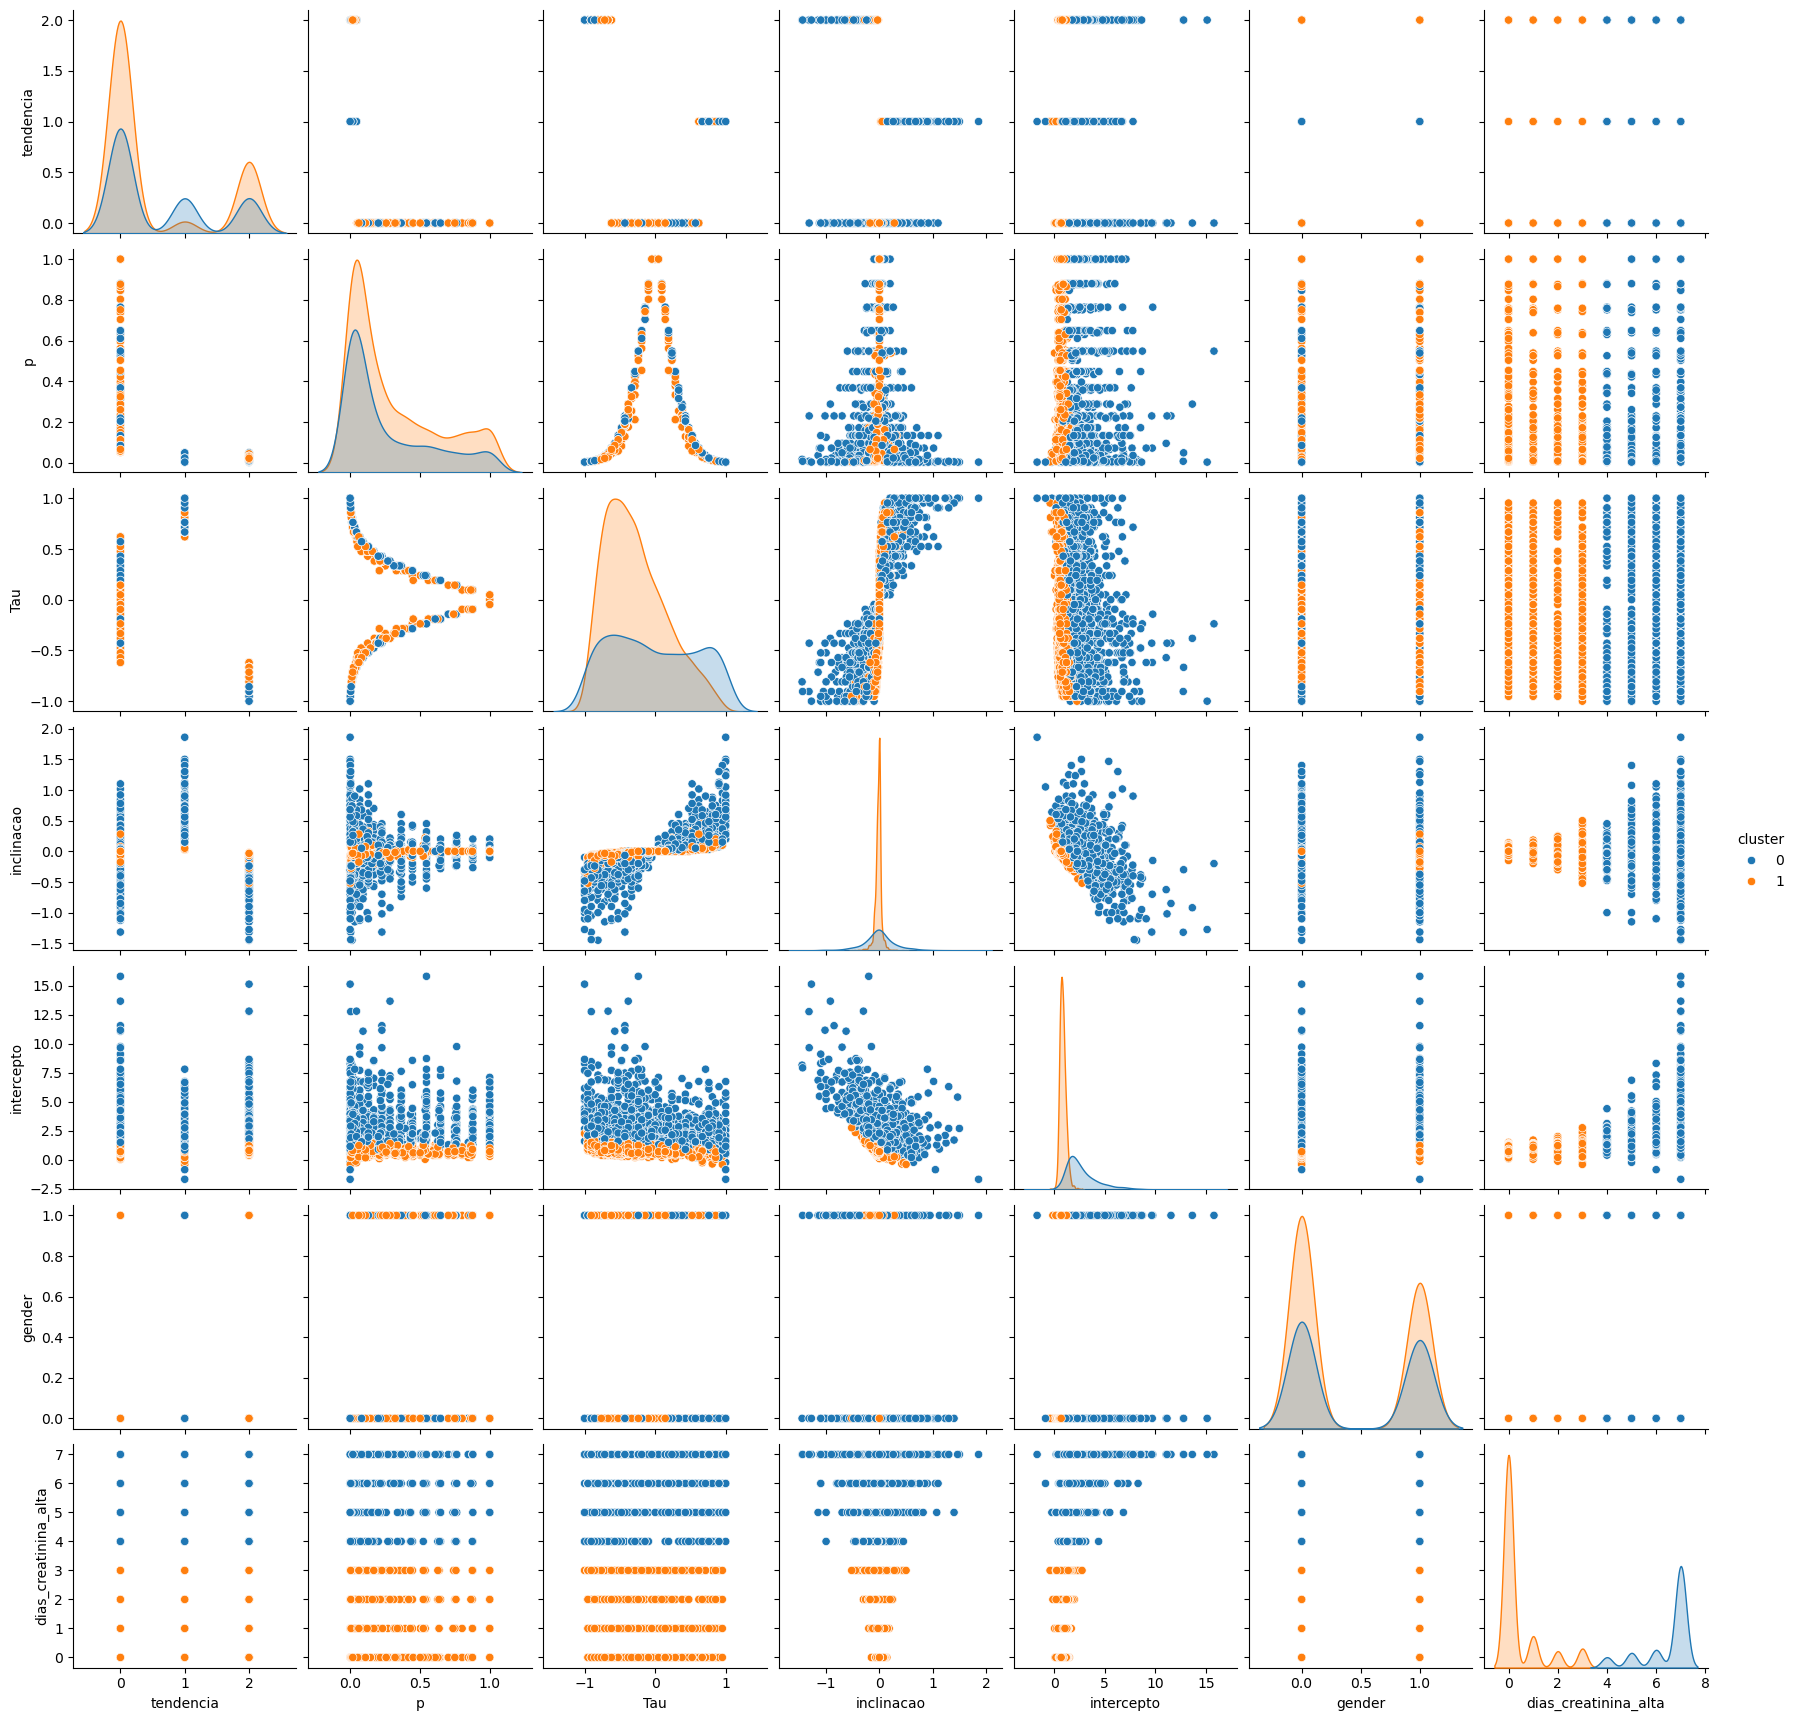

In [75]:
df_temp = df_creatinina.copy()
df_temp["cluster"] = y_creatinina

plt.figure(figsize = (12, 9))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

### Fuzzy C-Means

#### DATASET ureia

#### DATASET creatinina

### DBSCAN

#### DATASET ureia

#### DATASET creatinina